# Ejercicios Datos

In [1]:
import numpy as np
import pandas as pd

---

## Parte I

### Adquisición y guardado de datos.

- Lee los datos del fichero train.txt.

In [52]:
data = pd.read_csv('data/train.csv')

In [53]:
data.shape

(891, 12)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Cambia algunos de los datos y escribe el fichero train_mod.csv.

In [4]:
data.iloc[2:20, 5:10] = 0

In [5]:
data.to_csv('tmp/train_mod.csv')

In [6]:
pd.read_csv('tmp/train_mod.csv').head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,0.0,0,0,0,0.0000,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.0,0,0,0,0.0000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,0.0,0,0,0,0.0000,NaN,S


### Limpieza y preparación de datos.

- Carga el fichero  train.csv.

In [7]:
data = pd.read_csv('data/train.csv')

- Elimina todas las filas con NaN.

In [8]:
data.dropna(axis=0, inplace=True)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


- Elimina todos los registros donde la edad sea superior al tercer cuartil de esta.

In [10]:
data.Age.quantile(q=0.75)

47.5

In [11]:
data.Age < data.Age.quantile(q=0.75)

1       True
3       True
6      False
10      True
11     False
       ...  
871     True
872     True
879    False
887     True
889     True
Name: Age, Length: 183, dtype: bool

In [12]:
data_tr_q = data.loc[data.Age < data.Age.quantile(q=0.75)]

In [13]:
data_tr_q.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [14]:
data.shape

(183, 12)

In [15]:
data_tr_q.shape

(137, 12)

---

## Parte II

### Operaciones de combinar, juntar y agrupar.

- Calcula el número de pasajeros por clase.

In [18]:
data[['Pclass','PassengerId']].groupby('Pclass').count()

,PassengerId
Pclass,
1,158
2,15
3,10


In [22]:
data.groupby('Pclass').count() #Otra forma más rápida pero que te coje más columnas

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,158,158,158,158,158,158,158,158,158,158,158
2,15,15,15,15,15,15,15,15,15,15,15
3,10,10,10,10,10,10,10,10,10,10,10


- Calula la edad media de los supervivientes y los no supervivientes.

In [23]:
data.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,402.983333,1.216667,41.350000,0.366667,0.450000,64.048262
1,480.918699,1.178862,32.905854,0.512195,0.487805,85.821107


In [55]:
data[['Survived', 'Age']].groupby('Survived').mean()

,Age
Survived,
0,30.626179
1,28.343690


- Calcula el porcentaje de supervientes por edad.

In [56]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [60]:
dict_edades = {}
for grupo, data_grupo in data.groupby(['Age']):
    pct_sur = (data_grupo.Survived == 1).sum() / data_grupo.shape[0] #Dividido entre el número de filas total
    dict_edades[grupo] = pct_sur
dict_edades

#ESPERAR A SOLUCIONES DE PROFESOR! NO ESTÁ TERMINADO!

{0.42: 1.0,
 0.67: 1.0,
 0.75: 1.0,
 0.83: 1.0,
 0.92: 1.0,
 1.0: 0.7142857142857143,
 2.0: 0.3,
 3.0: 0.8333333333333334,
 4.0: 0.7,
 5.0: 1.0,
 6.0: 0.6666666666666666,
 7.0: 0.3333333333333333,
 8.0: 0.5,
 9.0: 0.25,
 10.0: 0.0,
 11.0: 0.25,
 12.0: 1.0,
 13.0: 1.0,
 14.0: 0.5,
 14.5: 0.0,
 15.0: 0.8,
 16.0: 0.35294117647058826,
 17.0: 0.46153846153846156,
 18.0: 0.34615384615384615,
 19.0: 0.36,
 20.0: 0.2,
 20.5: 0.0,
 21.0: 0.20833333333333334,
 22.0: 0.4074074074074074,
 23.0: 0.3333333333333333,
 23.5: 0.0,
 24.0: 0.5,
 24.5: 0.0,
 25.0: 0.2608695652173913,
 26.0: 0.3333333333333333,
 27.0: 0.6111111111111112,
 28.0: 0.28,
 28.5: 0.0,
 29.0: 0.4,
 30.0: 0.4,
 30.5: 0.0,
 31.0: 0.47058823529411764,
 32.0: 0.5,
 32.5: 0.5,
 33.0: 0.4,
 34.0: 0.4,
 34.5: 0.0,
 35.0: 0.6111111111111112,
 36.0: 0.5,
 36.5: 0.0,
 37.0: 0.16666666666666666,
 38.0: 0.45454545454545453,
 39.0: 0.35714285714285715,
 40.0: 0.46153846153846156,
 40.5: 0.0,
 41.0: 0.3333333333333333,
 42.0: 0.461538461538461

- Crea un gráfico de barras de los datos anteriores.

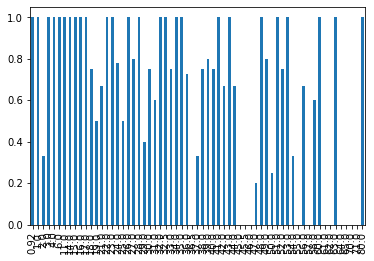

In [49]:
pd.Series(dict_edades).plot.bar()

- Crea una tabla pivote con supervivientes como índice, la clase como columnas y la media de edad.

In [63]:
pd.pivot_table(data, 
               values='Age', 
               index=['Survived'], 
               columns=['Pclass'], 
               aggfunc=np.mean)

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118
